In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tet = pd.read_csv("tetras.csv")
tri = pd.read_csv("triangles.csv")


,R,D,Analytic,Numerical,Analytic Area,Numerical Area,Mesh Time,TTH Time,nex Time,Num Elements,Num Nodes
0,0.000015,4.000000e-07,3.970394e-10,4.133450e-10,1.184353e-10,118.317,6.728852,25.154742,0.403413,24825,10314
1,0.000019,4.000000e-07,4.962992e-10,5.168430e-10,1.480441e-10,147.854,14.791019,32.476443,0.538885,30110,12557
2,0.000023,4.000000e-07,5.955591e-10,6.203730e-10,1.776529e-10,177.460,22.944012,39.671779,0.710538,36031,15017
3,0.000026,4.000000e-07,6.948189e-10,7.246160e-10,2.072617e-10,207.358,32.549182,49.368385,0.748773,42259,17572
4,0.000030,4.000000e-07,7.940788e-10,8.279730e-10,2.368705e-10,236.916,44.483147,54.879728,1.033243,47852,19981


In [5]:
tet["TotalTime"] = tet["Mesh Time"] + tet["TTH Time"] + tet["nex Time"]
tri["TotalTime"] = tri["Mesh Time"] + tri["TTH Time"] + tri["nex Time"]


tet["R/D"] = tet["R"]/tet["D"]
tet["error"] = abs(tet["Analytic"] - tet["Numerical"])
tet["error%"] = tet["error"]/tet["Analytic"] * 100
tet["Numerical Area"] = tet["Numerical Area"]*1e-12
tet["Area Error"] = abs(tet["Numerical Area"] - tet["Analytic Area"])
tet["%AreaArea"] = tet["Area Error"]/tet["Analytic Area"]

tri["R/D"] = tri["R"]/tri["D"]
tri["error"] = abs(tri["Analytic"] - tri["Numerical"])
tri["error%"] = tri["error"]/tri["Analytic"] * 100
tri["Numerical Area"] = tri["Numerical Area"]*1e-12
tri["Area Error"] = abs(tri["Numerical Area"] - tri["Analytic Area"])
tri["%AreaArea"] = tri["Area Error"]/tri["Analytic Area"]

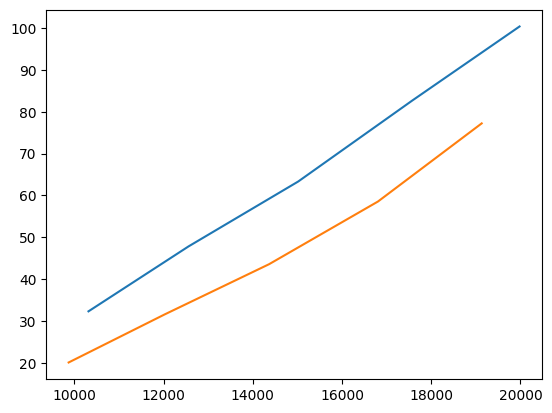

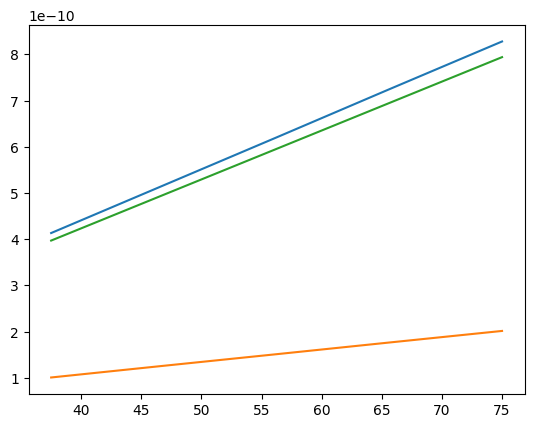

In [19]:
plt.plot(tet["Num Nodes"],tet["TotalTime"])
plt.plot(tri["Num Nodes"],tri["TotalTime"])
plt.show()

plt.plot(tet["R/D"],tet["Numerical"])
plt.plot(tri["R/D"],tri["Numerical"])
plt.plot(tri["R/D"],tri["Analytic"])
plt.show()

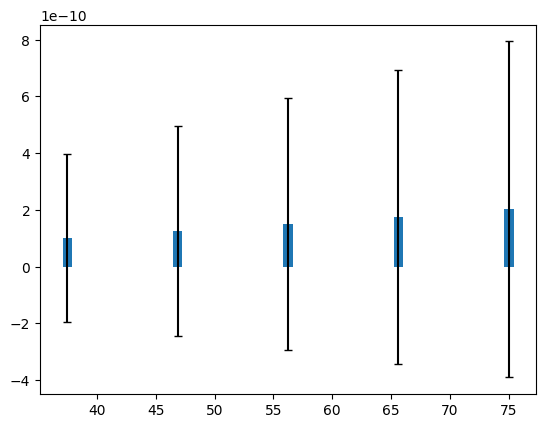

In [22]:
plt.bar(tri["R/D"],tri["Numerical"],yerr=tri["error"],capsize=3)
plt.show()

Conclusion: Triangular meshes are not the way to go. Possibly investigate for thin film structures